In [1]:
import flowkit as fk
from pathlib import Path

In [34]:
import bokeh
from bokeh.plotting import show
import matplotlib.pyplot as plt

bokeh.io.output_notebook()
%matplotlib inline

_ = plt.ioff()

Loading BokehJS ...

In [2]:
fk.__version__

'0.9.3'

In [3]:
help(fk.Sample)

Help on class Sample in module flowkit._models.sample:

class Sample(builtins.object)
 |  Sample(fcs_path_or_data, channel_labels=None, compensation=None, null_channel_list=None, ignore_offset_error=False, cache_original_events=False, subsample=10000)
 |  
 |  Represents a single FCS sample from an FCS file, NumPy array or pandas
 |  DataFrame.
 |  
 |  For Sample plot methods, pay attention to the defaults for the subsample
 |  arguments, as most will use the sub-sampled events by default for better
 |  performance. For compensation and transformation routines, all events are
 |  always processed.
 |  
 |  Note:
 |      Some FCS files incorrectly report the location of the last data byte
 |      as the last byte exclusive of the data section rather than the last
 |      byte inclusive of the data section. Technically, these are invalid
 |      FCS files but these are not corrupted data files. To attempt to read
 |      in these files, set the `ignore_offset_error` option to True.
 |  

In [4]:
fcs_path = Path("../example_data/data1.fcs")
sample = fk.Sample(
    fcs_path_or_data=fcs_path,
    channel_labels=None,
    compensation=None,
    ignore_offset_error=False,
)

In [5]:
sample

Sample(v2.0, B07, 8 channels, 13367 events)

In [6]:
sample.version

2.0

In [7]:
sample.get_metadata()

{'byteord': '4,3,2,1',
 'datatype': 'I',
 'nextdata': '0',
 'sys': 'Macintosh System Software 9.0.4',
 'creator': 'CELLQuestª 3.3',
 'tot': '13367',
 'mode': 'L',
 'par': '8',
 'p1n': 'FSC-H',
 'p1r': '1024',
 'p1b': '16',
 'p1e': '0,0',
 'p1g': '3.67',
 'p2n': 'SSC-H',
 'p2r': '1024',
 'p2b': '16',
 'p2e': '0,0',
 'p2g': '8',
 'p3n': 'FL1-H',
 'p3r': '1024',
 'p3b': '16',
 'p3e': '4,0',
 'p4n': 'FL2-H',
 'p4r': '1024',
 'p4b': '16',
 'p4e': '4,0',
 'p5n': 'FL3-H',
 'p5r': '1024',
 'p5b': '16',
 'p5e': '4,0',
 'p1s': 'FSC-Height',
 'p2s': 'SSC-Height',
 'p3s': 'CD4 FITC',
 'p4s': 'CD8 B PE',
 'p5s': 'CD3 PerCP',
 'p6n': 'FL2-A',
 'p6r': '1024',
 'p6b': '16',
 'p6e': '0,0',
 'timeticks': '100',
 'p7n': 'FL4-H',
 'p7r': '1024',
 'p7e': '4,0',
 'p7b': '16',
 'p7s': 'CD8 APC',
 'p8n': 'Time',
 'p8r': '1024',
 'p8e': '0,0',
 'p8b': '16',
 'p8s': 'Time (102.40 sec.)',
 'sample id': 'Default Patient ID',
 'src': 'Default',
 'case number': 'Default Case Number',
 'cyt': 'FACSCalibur',
 'cytnum

In [8]:
sample.channels  # describes the channels

channel_number    pnn                 pns   png         pne     pnr
0               1  FSC-H          FSC-Height  3.67  (0.0, 0.0)  1024.0
1               2  SSC-H          SSC-Height  8.00  (0.0, 0.0)  1024.0
2               3  FL1-H            CD4 FITC  1.00  (4.0, 1.0)  1024.0
3               4  FL2-H            CD8 B PE  1.00  (4.0, 1.0)  1024.0
4               5  FL3-H           CD3 PerCP  1.00  (4.0, 1.0)  1024.0
5               6  FL2-A                      1.00  (0.0, 0.0)  1024.0
6               7  FL4-H             CD8 APC  1.00  (4.0, 1.0)  1024.0
7               8   Time  Time (102.40 sec.)  1.00  (0.0, 0.0)  1024.0

In [9]:
type(sample.channels)

pandas.core.frame.DataFrame

In [10]:
sample.pnn_labels  # short names for the channels

['FSC-H', 'SSC-H', 'FL1-H', 'FL2-H', 'FL3-H', 'FL2-A', 'FL4-H', 'Time']

In [11]:
sample.pns_labels  # full names for the channels

['FSC-Height',
 'SSC-Height',
 'CD4 FITC',
 'CD8 B PE',
 'CD3 PerCP',
 '',
 'CD8 APC',
 'Time (102.40 sec.)']

In [12]:
sample.fluoro_indices  # indices belonging to fluorescence channels

[2, 3, 4, 5, 6]

In [13]:
sample.get_channel_index('FL2-H')  # get the channel number from the channel's short name

3

In [15]:
sample.get_channel_index(4)  # get the channel index from the channel number

3

In [16]:
sample.get_channel_number_by_label('FL2-H')  # get the channel number by the channel's short name

4

In [17]:
sample.event_count  # number of events

13367

In [18]:
sample.acquisition_date  # date of acquisition, duh

'23-Aug-02'

In [32]:
sample.subsample_events(subsample_count=10000, random_seed=666)  # pseudorandomly subsamples the original dataset

In [33]:
sample.subsample_indices  # indices of the cells belonging to the subsample

array([ 3223,  3059,  8205, ...,  2241, 11347, 12058])

In [36]:
p = sample.plot_histogram(channel_label_or_number='FSC-H', source='raw', bins=256)
show(p)

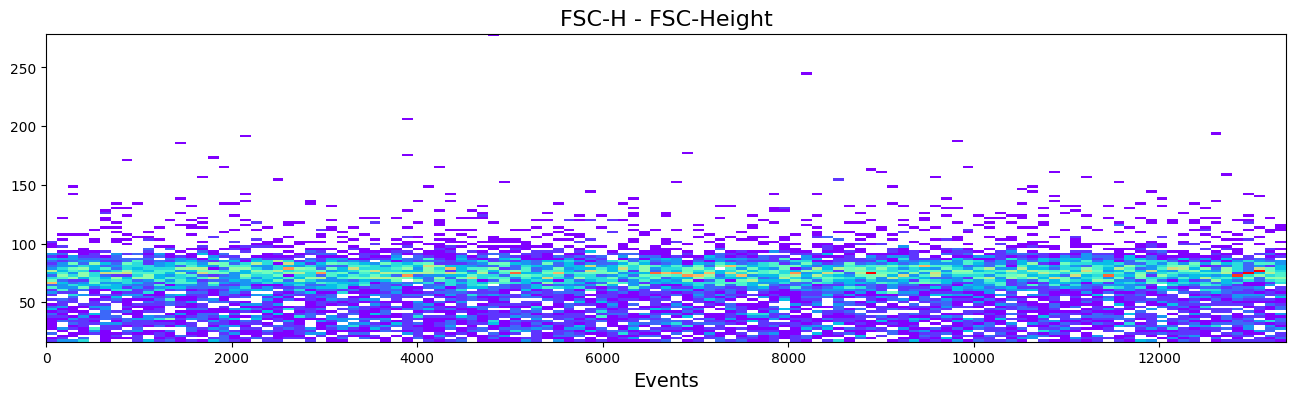

In [42]:
f = sample.plot_channel(channel_label_or_number='FSC-H', source='raw')  # Plot a channel vs cell number, binning multiple cells together. Similar to plotting the channel vs time, but the events are equally distributed along the x axis.
plt.show(f)
plt.close()

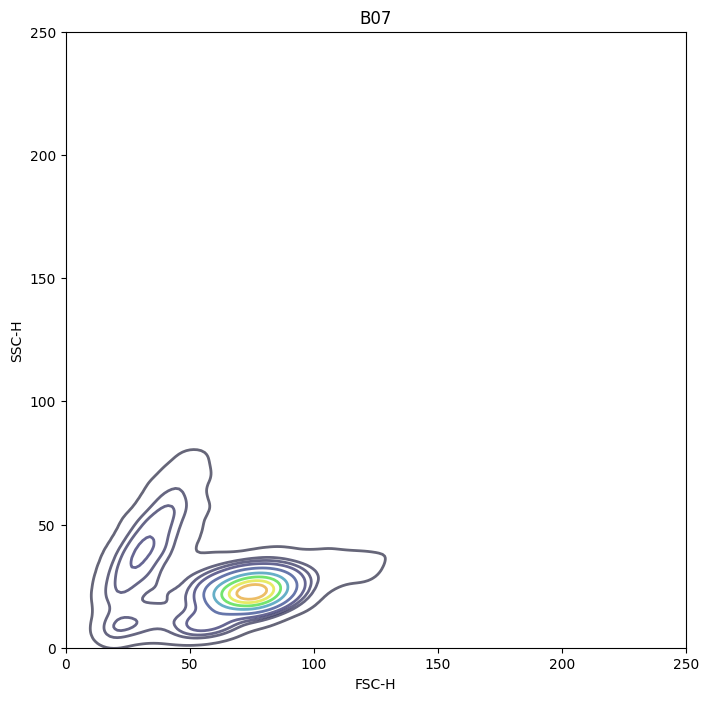

In [44]:
x_min = y_min = 0
x_max = y_max = 250
f = sample.plot_contour(x_label_or_number='FSC-H', y_label_or_number='SSC-H', source='raw', x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max)  # plot a contour plot
plt.show(f)
plt.close()

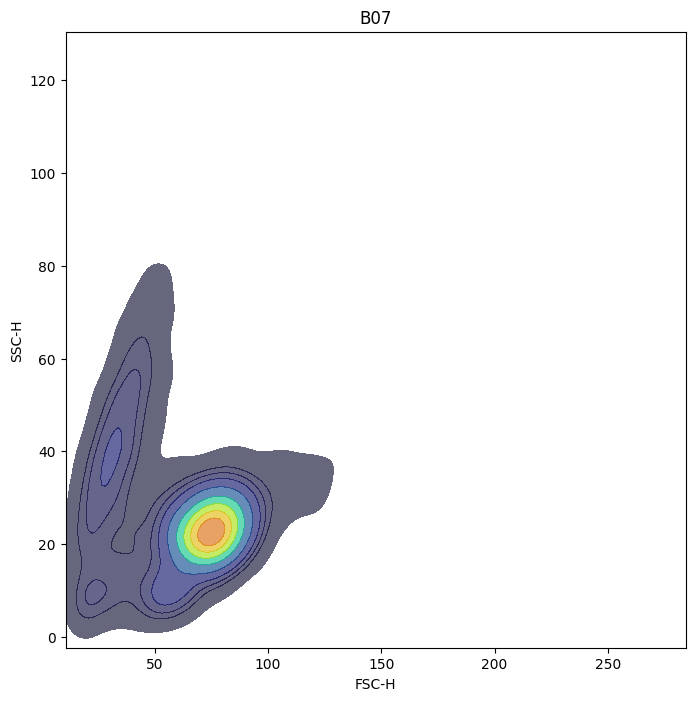

In [45]:
f = sample.plot_contour(x_label_or_number='FSC-H', y_label_or_number='SSC-H', source='raw', fill=True)  # plot a filled contour plot
plt.show(f)
plt.close()

/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/flowkit/_models/sample.py:756: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  seaborn.scatterplot(


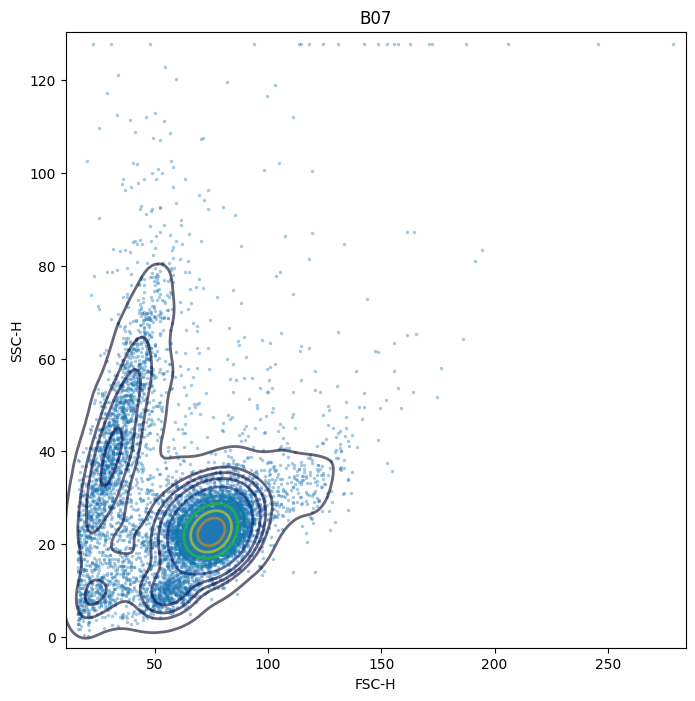

In [46]:
f = sample.plot_contour(x_label_or_number='FSC-H', y_label_or_number='SSC-H', source='raw', plot_events=True)  # plot a contour plot together with the events
plt.show(f)
plt.close()

In [48]:
# scatter plot with bokeh is faster (and it makes it a pseudocolor plot)
p = sample.plot_scatter(x_label_or_number='FSC-H', y_label_or_number='SSC-H', source='raw', color_density=True)
show(p)

In [50]:
xform = fk.transforms.LogicleTransform(transform_id='some_biexp', param_t=1024, param_m=4.5, param_w=0.5, param_a=0) # define a biexponential transform
sample.apply_transform(transform=xform)  # apply the transform

In [53]:
p = sample.plot_scatter(x_label_or_number='FL1-H', y_label_or_number='FL2-H', source='raw')  # source=raw plots the untransformed data
show(p)

In [54]:
p = sample.plot_scatter(x_label_or_number='FL1-H', y_label_or_number='FL2-H', source='xform')  # source=raw plots the transformed data
show(p)

In [55]:
# make interactive scatter plots for all combinations in a set of channels
spm = sample.plot_scatter_matrix(
        source='xform', 
        channel_labels_or_numbers=['FSC-H', 'SSC-H', 'FL3-H', 'FL4-H'],
        color_density=True
        )
show(spm)

In [56]:
sample.get_events(source='xform', subsample=False)  # returns a numpy array with the events. We can choose to return the raw or transformed data and return all the events or only the subsampled ones
# This method returns the actual events as an array, NOT A COPY OF THEM!

array([[8.80108992e+01, 2.72500000e+01, 5.17297410e-01, ...,
        4.79773530e-01, 4.83513649e-01, 0.00000000e+00],
       [1.90735695e+01, 5.37500000e+00, 6.77265249e-01, ...,
        1.11111111e-01, 4.64114908e-01, 0.00000000e+00],
       [7.05722071e+01, 2.60000000e+01, 4.06638304e-01, ...,
        1.11111111e-01, 5.34479140e-01, 0.00000000e+00],
       ...,
       [6.21253406e+01, 2.76250000e+01, 5.65889097e-01, ...,
        1.11111111e-01, 3.70872414e-01, 1.74000000e+02],
       [3.62397820e+01, 6.45000000e+01, 4.88106949e-01, ...,
        1.11111111e-01, 4.78910857e-01, 1.74000000e+02],
       [6.64850136e+01, 8.75000000e+00, 3.47347050e-01, ...,
        1.11111111e-01, 4.99093791e-01, 1.74000000e+02]])

In [58]:
# get events only for one channel, based on its name
channel_idx = sample.get_channel_index('FSC-H')
sample.get_channel_events(channel_index=channel_idx, source='xform', subsample=False)
# note that scattering values are not applied the transforms, only fluorescence channels

array([88.01089918, 19.07356948, 70.57220708, ..., 62.1253406 ,
       36.23978202, 66.48501362])

In [59]:
# convert events to Pandas dataframe
sample.as_dataframe(source='xform', subsample=False)

pnn        FSC-H      SSC-H     FL1-H     FL2-H     FL3-H     FL2-A     FL4-H  \
pns   FSC-Height SSC-Height  CD4 FITC  CD8 B PE CD3 PerCP             CD8 APC   
0      88.010899     27.250  0.517297  0.672002  0.559629  0.479774  0.483514   
1      19.073569      5.375  0.677265  0.307901  0.826510  0.111111  0.464115   
2      70.572207     26.000  0.406638  0.574814  0.427576  0.111111  0.534479   
3      98.910082     31.750  0.489024  0.589944  0.450145  0.111111  0.510031   
4      29.972752     34.750  0.413327  0.414281  0.413327  0.111111  0.500007   
...          ...        ...       ...       ...       ...       ...       ...   
13362  66.212534     19.625  0.512758  0.585500  0.412373  0.111111  0.496352   
13363  70.844687     25.500  0.527257  0.619182  0.443591  0.111111  0.510031   
13364  62.125341     27.625  0.565889  0.628894  0.414281  0.111111  0.370872   
13365  36.239782     64.500  0.488107  0.486271  0.518204  0.111111  0.478911   
13366  66.485014      8.750  0.347347  0.323674  0.329598  0.111111  0.499094   

pnn                 Time  
pns   Time (102.40 sec.)  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
13362              174.0  
13363              174.0  
13364              174.0  
13365              174.0  
13366              174.0  

[13367 rows x 8 columns]

In [62]:
sample.export?

Signature:
sample.export(
    filename,
    source='xform',
    exclude_neg_scatter=False,
    exclude_flagged=False,
    exclude_normal=False,
    subsample=False,
    include_metadata=False,
    directory=None,
)
Docstring:
Export Sample event data to either a new FCS file or a CSV file. Format determined by filename extension.

:param filename: Text string to use for the exported file name. File type is determined by
    the filename extension (supported types are .fcs & .csv).
:param source: 'orig', 'raw', 'comp', 'xform' for whether the original (no gain applied),
    raw (orig + gain), compensated (raw + comp), or transformed (comp + xform) events  are
    used for exporting
:param exclude_neg_scatter: Whether to exclude negative scatter events. Default is False.
:param exclude_flagged: Whether to exclude flagged events. Default is False.
:param exclude_normal: Whether to exclude "normal" events. This is useful for retrieving all
     the "bad" events (neg scatter and/or flagged 